# Preprocessing

In [ ]:
#  Import necessary libraries
import pandas as pd

import numpy as np

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = load_iris()


df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.isnull().sum())
df['target'] = iris.target  # We'll drop this for clustering

# Drop the target/label column
df_clean = df.drop('target', axis=1)


# Scale the features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_clean)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


# KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Optional: Check cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### What is KMeans Clustering?

KMeans is a popular clustering method that divides data into K groups, where each group is centered around a point called a centroid.

Here’s how it works:

    Pick K random points as initial centroids.

    Assign each data point to the closest centroid (based on distance).

    Recalculate the centroids based on the new clusters.

    Repeat steps 2 and 3 until the clusters stop changing.

KMeans works well when the data forms round, evenly sized clusters, which is true for the Iris dataset. Since it’s clean and balanced with 3 natural groups (based on flower species), KMeans is a great fit.

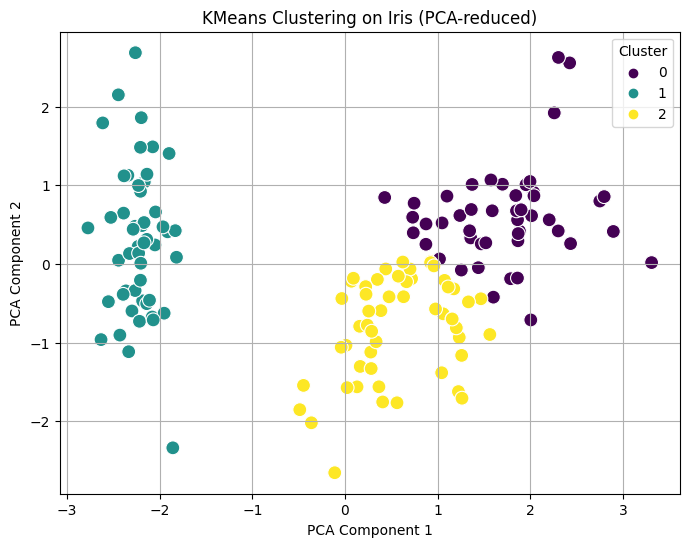

In [ ]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('KMeans Clustering on Iris (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Score (KMeans):", silhouette_score(X_scaled, kmeans_labels))


Silhouette Score (KMeans): 0.45994823920518635


# Hierarchical Clustering

**What is Hierarchical Clustering?**

Hierarchical clustering is a method of grouping data into a tree-like structure. It starts with each point as its own cluster and gradually merges the closest ones based on distance until everything forms one big cluster.

    You can visualize this merging process using a dendrogram, which helps you decide how many clusters to keep by “cutting” it at a certain height.

    One great thing about this method is that you don’t need to decide the number of clusters in advance.

    It's a good fit for the Iris dataset because it's small (150 samples) and well-structured, making the merging process both efficient and meaningful.

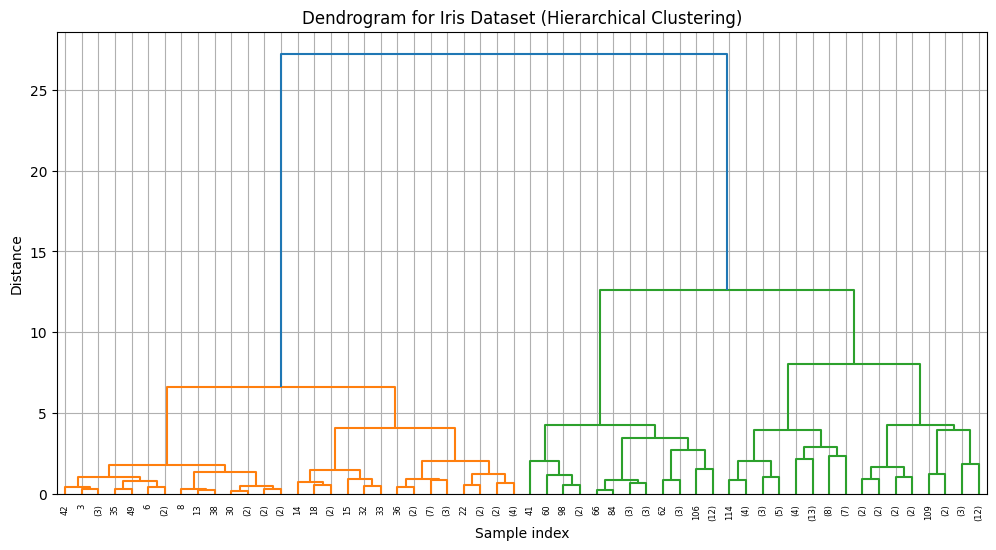

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')  # Ward minimizes within-cluster variance

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for Iris Dataset (Hierarchical Clustering)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


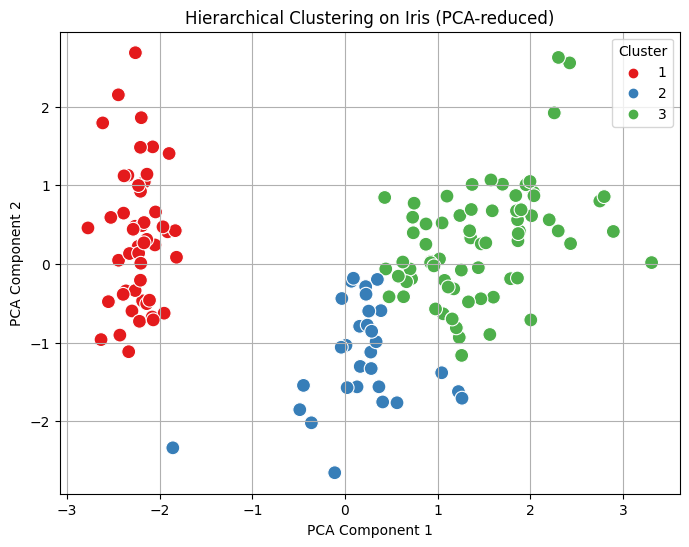

In [ ]:
# Choose number of clusters (k=3, like Iris species)
hier_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# PCA for 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hier_labels, palette='Set1', s=100)
plt.title("Hierarchical Clustering on Iris (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Score (Hierarchical):", silhouette_score(X_scaled, hier_labels))


Silhouette Score (Hierarchical): 0.446689041028591


## Final Conclusion

- Both **KMeans** and **Hierarchical Clustering** worked well on the Iris dataset, discovering 3 natural groupings that align closely with the known species.
- KMeans produced slightly better-defined clusters based on the **Silhouette Score (0.46)**, while hierarchical clustering came close with **0.45**.
- The PCA plots show that both methods formed meaningful clusters, especially KMeans, where the boundaries between groups were more distinct.
- Hierarchical clustering gave extra insight through the **dendrogram**, helping visualize how clusters were merged step-by-step.
- Overall, the Iris dataset was a great fit for both techniques due to its structure and size, and each method provided unique interpretability.
